# Loading the libraries and dataset

In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

C:\Users\ChinmoyRaj\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
credit=pd.read_csv("D:\\AI STUDY MATERIAL\\Capstone project\\2\\creditcard.csv")
credit.head()

C:\Users\ChinmoyRaj\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,45.0,Male,South,9120.0,Ownhouse,Self_Emp,Matric,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2,Bad
1,0.0,0.957151,40.0,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1,Good
2,0.0,0.658180,38.0,Female,South,3042.0,Ownhouse,Self_Emp,PhD,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0,Good
3,0.0,0.233810,30.0,Female,South,3300.0,Ownhouse,Self_Emp,Professional,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0,Good
4,0.0,0.907239,49.0,Male,South,63588.0,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0,Good


In [3]:
credit.tail()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
149997,0.0,0.246044,58.0,Male,North,NaN,Rented,Officer2,Professional,0.0,3870.000000,NaN,18.0,0.0,1.0,0.0,0,Good
149998,0.0,0.000000,30.0,Male,North,5716.0,Rented,Non-officer,Professional,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0,Good
149999,0.0,0.850283,64.0,Male,North,8158.0,Ownhouse,Self_Emp,Professional,0.0,0.249908,8158.0,8.0,0.0,2.0,0.0,0,Good
150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good,NaN
150001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad,NaN


In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150002 entries, 0 to 150001
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            150000 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   Gender                                150000 non-null  object 
 4   Region                                150000 non-null  object 
 5   MonthlyIncome                         120269 non-null  float64
 6   Rented_OwnHouse                       150000 non-null  object 
 7   Occupation                            150000 non-null  object 
 8   Education                             150000 non-null  object 
 9   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 10  DebtRatio                             150000 non-null  float64
 11  

In [5]:
credit.describe()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,MonthlyIncome,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse
count,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,6.048438,52.295207,6.670221e+03,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387
std,0.249746,249.755371,14.771866,1.438467e+04,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,3.400000e+03,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,5.400000e+03,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000
75%,0.000000,0.559046,63.000000,8.249000e+03,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000
max,1.000000,50708.000000,109.000000,3.008750e+06,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000


Checking missing or null values:

In [6]:
credit.isnull().sum()

NPA Status                                  2
RevolvingUtilizationOfUnsecuredLines        2
age                                         2
Gender                                      2
Region                                      2
MonthlyIncome                           29733
Rented_OwnHouse                             2
Occupation                                  2
Education                                   2
NumberOfTime30-59DaysPastDueNotWorse        2
DebtRatio                                   2
MonthlyIncome.1                         29733
NumberOfOpenCreditLinesAndLoans             2
NumberOfTimes90DaysLate                     2
NumberRealEstateLoansOrLines                2
NumberOfTime60-89DaysPastDueNotWorse        2
NumberOfDependents                       3924
Good_Bad                                    2
dtype: int64

In [7]:
credit.shape

(150002, 18)

As we can see from tail section that last two rows doesnt contain any data and one variable has wrong data in it. So we will remove these rows.

In [8]:
credit=credit.drop([150000,150001])

Now, for Monthlyincome and monthlyincome.1 we will check the percentage of missing value and then we will replace or remove them according to the result.

In [9]:
(credit['MonthlyIncome'].isnull().sum()/credit.shape[0])*100

19.820666666666668

In [10]:
(credit['MonthlyIncome.1'].isnull().sum()/credit.shape[0])*100

19.820666666666668

In [11]:
(credit['NumberOfDependents'].isnull().sum()/credit.shape[0])*100

2.616

As percentage of missing values is less we will replace them by their mean values.

In [12]:
credit['MonthlyIncome']=credit['MonthlyIncome'].fillna(credit['MonthlyIncome'].mean())

In [13]:
credit['MonthlyIncome.1']=credit['MonthlyIncome.1'].fillna(credit['MonthlyIncome.1'].mean())

For the variable 'NumberOfDependents' we whave to fill null values with its mode value. But as this variable contains both 'int' type and 'float' type data, we will have to first convert them into 'int' type and then check for the mode value.

In [14]:
x=credit['NumberOfDependents'].dropna()
x

0         2
1         1
2         0
3         0
4         0
         ..
149995    0
149996    2
149997    0
149998    0
149999    0
Name: NumberOfDependents, Length: 146076, dtype: object

In [15]:
x=x.astype(int)
x.value_counts()

0     86902
1     26316
2     19522
3      9483
4      2862
5       746
6       158
7        51
8        24
10        5
9         5
20        1
13        1
Name: NumberOfDependents, dtype: int64

In [16]:
credit['NumberOfDependents']=credit['NumberOfDependents'].fillna(0)
credit['NumberOfDependents']=credit['NumberOfDependents'].astype(int)

In [17]:
credit.isnull().sum()

NPA Status                              0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
Gender                                  0
Region                                  0
MonthlyIncome                           0
Rented_OwnHouse                         0
Occupation                              0
Education                               0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome.1                         0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
Good_Bad                                0
dtype: int64

Now, we have a doubt that the two variable(i.e Monthlyincome and monthlyincome.1) could be duplicate data. So we will check for simillarity between the two variable

In [18]:
a=np.where(credit['MonthlyIncome']==credit['MonthlyIncome.1'])
a

(array([     0,      1,      2, ..., 149997, 149998, 149999], dtype=int64),)

In [19]:
a[0].shape

(150000,)

As we can see that all the datas are equal in these two variable, so we will remove one of them.

In [20]:
credit=credit.drop('MonthlyIncome.1',1)
credit.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,45.0,Male,South,9120.0,Ownhouse,Self_Emp,Matric,2.0,0.802982,13.0,0.0,6.0,0.0,2,Bad
1,0.0,0.957151,40.0,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.0,0.121876,4.0,0.0,0.0,0.0,1,Good
2,0.0,0.658180,38.0,Female,South,3042.0,Ownhouse,Self_Emp,PhD,1.0,0.085113,2.0,1.0,0.0,0.0,0,Good
3,0.0,0.233810,30.0,Female,South,3300.0,Ownhouse,Self_Emp,Professional,0.0,0.036050,5.0,0.0,0.0,0.0,0,Good
4,0.0,0.907239,49.0,Male,South,63588.0,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,7.0,0.0,1.0,0.0,0,Good


Now we will categorize the 'age' variable into 5 category.(i.e kid, young, early_adult, middle_adult and late_adult)

In [21]:
credit['age'].value_counts()

49.0     3837
48.0     3806
50.0     3753
63.0     3719
47.0     3719
         ... 
103.0       3
109.0       2
105.0       1
107.0       1
0.0         1
Name: age, Length: 86, dtype: int64

In [22]:
bins=[0,10,18,30,60,120]
labels=['Kid','Young','Early_Adult','Middle_Adult','Late_Adult']
credit['age']=pd.cut(credit['age'],bins=bins,labels=labels,right=False)
credit['age']=credit['age'].astype(object)
credit.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,Middle_Adult,Male,South,9120.0,Ownhouse,Self_Emp,Matric,2.0,0.802982,13.0,0.0,6.0,0.0,2,Bad
1,0.0,0.957151,Middle_Adult,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.0,0.121876,4.0,0.0,0.0,0.0,1,Good
2,0.0,0.658180,Middle_Adult,Female,South,3042.0,Ownhouse,Self_Emp,PhD,1.0,0.085113,2.0,1.0,0.0,0.0,0,Good
3,0.0,0.233810,Middle_Adult,Female,South,3300.0,Ownhouse,Self_Emp,Professional,0.0,0.036050,5.0,0.0,0.0,0.0,0,Good
4,0.0,0.907239,Middle_Adult,Male,South,63588.0,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,7.0,0.0,1.0,0.0,0,Good


In [23]:
col=credit.columns
col

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'Gender',
       'Region', 'MonthlyIncome', 'Rented_OwnHouse', 'Occupation', 'Education',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'Good_Bad'],
      dtype='object')

In [24]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 17 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            150000 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  object 
 3   Gender                                150000 non-null  object 
 4   Region                                150000 non-null  object 
 5   MonthlyIncome                         150000 non-null  float64
 6   Rented_OwnHouse                       150000 non-null  object 
 7   Occupation                            150000 non-null  object 
 8   Education                             150000 non-null  object 
 9   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 10  DebtRatio                             150000 non-null  float64
 11  

In [25]:
pf=ProfileReport(credit,title='Profile Report', explorative=True)
pf.to_widgets()

In [26]:
x=credit[['NumberOfTimes90DaysLate','NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse']]
x.head(2)

,NumberOfTimes90DaysLate,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse
0,0.0,2.0,0.0
1,0.0,0.0,0.0


In [27]:
pca_digits=PCA(n_components=1)
NumberOfTime0_90DaysLate = pca_digits.fit_transform(x)
x.shape, NumberOfTime0_90DaysLate.shape

((150000, 3), (150000, 1))

In [28]:
NumberOfTime0_90DaysLate

array([[ 0.62268113],
       [-0.53576002],
       [ 0.62052298],
       ...,
       [-0.53576002],
       [-0.53576002],
       [-0.53576002]])

In [29]:
credit['NumberOfTime0-90DaysLate']=NumberOfTime0_90DaysLate
credit=credit.drop(['NumberOfTimes90DaysLate','NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse'],1)
credit.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,Good_Bad,NumberOfTime0-90DaysLate
0,1.0,0.766127,Middle_Adult,Male,South,9120.0,Ownhouse,Self_Emp,Matric,0.802982,13.0,6.0,2,Bad,0.622681
1,0.0,0.957151,Middle_Adult,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.121876,4.0,0.0,1,Good,-0.535760
2,0.0,0.658180,Middle_Adult,Female,South,3042.0,Ownhouse,Self_Emp,PhD,0.085113,2.0,0.0,0,Good,0.620523
3,0.0,0.233810,Middle_Adult,Female,South,3300.0,Ownhouse,Self_Emp,Professional,0.036050,5.0,0.0,0,Good,-0.535760
4,0.0,0.907239,Middle_Adult,Male,South,63588.0,Ownhouse,Self_Emp,Post-Grad,0.024926,7.0,1.0,0,Good,0.043461


Now for each variable we will check the skewness-

In [30]:
labels=['NPA Status','RevolvingUtilizationOfUnsecuredLines','MonthlyIncome','DebtRatio','NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines','NumberOfTime0-90DaysLate','NumberOfDependents']
sk=[]
for i in labels:
    sk.append(credit[i].skew())
a=pd.DataFrame({'Variable':labels,'Skew':sk})
a

,Variable,Skew
0,NPA Status,3.468857
1,RevolvingUtilizationOfUnsecuredLines,97.631574
2,MonthlyIncome,127.357969
3,DebtRatio,95.157793
4,NumberOfOpenCreditLinesAndLoans,1.215314
5,NumberRealEstateLoansOrLines,3.482484
6,NumberOfTime0-90DaysLate,23.277463
7,NumberOfDependents,1.626059


As skewness of some variables are high, we will try to remove them by transforming the data-

In [31]:
credit['RevolvingUtilizationOfUnsecuredLines']=np.sqrt(np.sqrt(credit['RevolvingUtilizationOfUnsecuredLines'])**0.6)
credit['MonthlyIncome']=np.sqrt(credit['MonthlyIncome'])**0.6
credit['NumberRealEstateLoansOrLines']=np.sqrt(credit['NumberRealEstateLoansOrLines'])
credit['DebtRatio']=np.sqrt(credit['DebtRatio'])**0.13
credit['NumberOfOpenCreditLinesAndLoans']=np.sqrt(credit['NumberOfOpenCreditLinesAndLoans'])
credit['NumberOfDependents']=np.sqrt(credit['NumberOfDependents'])**0.01

In [32]:
lb=LabelEncoder()
credit['Good_Bad']=lb.fit_transform(credit['Good_Bad'])

In [33]:
credit.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,Good_Bad,NumberOfTime0-90DaysLate
0,1.0,0.960827,Middle_Adult,Male,South,15.416950,Ownhouse,Self_Emp,Matric,0.985839,3.605551,2.44949,1.003472,0,0.622681
1,0.0,0.993452,Middle_Adult,Female,South,10.580154,Ownhouse,Self_Emp,Graduate,0.872137,2.000000,0.00000,1.000000,1,-0.535760
2,0.0,0.939186,Middle_Adult,Female,South,11.090414,Ownhouse,Self_Emp,PhD,0.852020,1.414214,0.00000,0.000000,1,0.620523
3,0.0,0.804136,Middle_Adult,Female,South,11.364601,Ownhouse,Self_Emp,Professional,0.805747,2.236068,0.00000,0.000000,1,-0.535760
4,0.0,0.985504,Middle_Adult,Male,South,27.606576,Ownhouse,Self_Emp,Post-Grad,0.786651,2.645751,1.00000,0.000000,1,0.043461


In [34]:
num_data=credit.select_dtypes(exclude=object)
num_data.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,MonthlyIncome,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,Good_Bad,NumberOfTime0-90DaysLate
0,1.0,0.960827,15.416950,0.985839,3.605551,2.44949,1.003472,0,0.622681
1,0.0,0.993452,10.580154,0.872137,2.000000,0.00000,1.000000,1,-0.535760
2,0.0,0.939186,11.090414,0.852020,1.414214,0.00000,0.000000,1,0.620523
3,0.0,0.804136,11.364601,0.805747,2.236068,0.00000,0.000000,1,-0.535760
4,0.0,0.985504,27.606576,0.786651,2.645751,1.00000,0.000000,1,0.043461


Now we will check correlation of the numerical variables with output variable.

In [35]:
from scipy.stats import pearsonr
num_columns=num_data.columns
corr=[]
for i in num_columns:
    x=pearsonr(num_data[i],credit['Good_Bad'])
    corr.append(x)
corr

[(-0.9999999999999238, 0.0),
 (-0.17111132249229005, 0.0),
 (0.04206658554567509, 9.967005420859424e-60),
 (0.011820918668820905, 4.686717042059154e-06),
 (0.05217333512129224, 6.495510504355559e-91),
 (0.032778312973163415, 6.043418391047592e-37),
 (-0.043579867998571775, 5.6760272697067826e-64),
 (0.9999999999999238, 0.0),
 (-0.11553610981140054, 0.0)]

In [36]:
x1=np.array(corr)
pvalue1=pd.Series(x1[:,1],index=num_columns)
pvalue1

NPA Status                              0.000000e+00
RevolvingUtilizationOfUnsecuredLines    0.000000e+00
MonthlyIncome                           9.967005e-60
DebtRatio                               4.686717e-06
NumberOfOpenCreditLinesAndLoans         6.495511e-91
NumberRealEstateLoansOrLines            6.043418e-37
NumberOfDependents                      5.676027e-64
Good_Bad                                0.000000e+00
NumberOfTime0-90DaysLate                0.000000e+00
dtype: float64

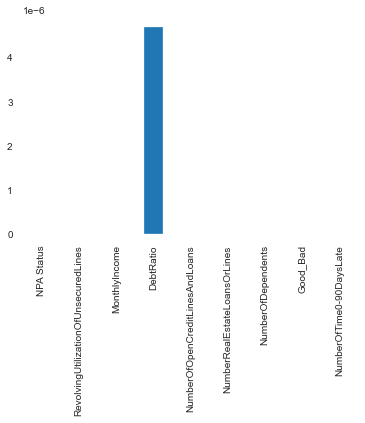

In [37]:
pvalue1.plot.bar()

Here we can see all the variables have very low p-value which shows they are not highly correlated with output variable.

In [38]:
num_data.head(2)

,NPA Status,RevolvingUtilizationOfUnsecuredLines,MonthlyIncome,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,Good_Bad,NumberOfTime0-90DaysLate
0,1.0,0.960827,15.416950,0.985839,3.605551,2.44949,1.003472,0,0.622681
1,0.0,0.993452,10.580154,0.872137,2.000000,0.00000,1.000000,1,-0.535760


In [39]:
cat_data=credit.select_dtypes(include=object)
cat_data.head()

,age,Gender,Region,Rented_OwnHouse,Occupation,Education
0,Middle_Adult,Male,South,Ownhouse,Self_Emp,Matric
1,Middle_Adult,Female,South,Ownhouse,Self_Emp,Graduate
2,Middle_Adult,Female,South,Ownhouse,Self_Emp,PhD
3,Middle_Adult,Female,South,Ownhouse,Self_Emp,Professional
4,Middle_Adult,Male,South,Ownhouse,Self_Emp,Post-Grad


In [40]:
cat_data['age']=lb.fit_transform(cat_data['age'])
cat_data['Gender']=lb.fit_transform(cat_data['Gender'])
cat_data['Region']=lb.fit_transform(cat_data['Region'])
cat_data['Rented_OwnHouse']=lb.fit_transform(cat_data['Rented_OwnHouse'])
cat_data['Occupation']=lb.fit_transform(cat_data['Occupation'])
cat_data['Education']=lb.fit_transform(cat_data['Education'])
cat_data

C:\Users\ChinmoyRaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ChinmoyRaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ChinmoyRaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,age,Gender,Region,Rented_OwnHouse,Occupation,Education
0,3,1,3,0,4,1
1,3,0,3,0,4,0
2,3,0,3,0,4,2
3,3,0,3,0,4,4
4,3,1,3,0,4,3
...,...,...,...,...,...,...
149995,2,1,2,0,0,4
149996,3,1,2,0,4,4
149997,3,1,2,1,2,4
149998,3,1,2,1,0,4


In [41]:
X=cat_data
Y=credit['Good_Bad']

Now we will check the correlation of categorical variable with the output variable-

In [42]:
from sklearn.feature_selection import chi2
chi_scores= chi2(X,Y)
chi_scores

(array([6.60935010e+00, 1.35736842e+00, 8.57256291e+03, 7.32621097e-01,
        2.79330648e-01, 2.18863964e+02]),
 array([1.01444678e-02, 2.43994078e-01, 0.00000000e+00, 3.92034906e-01,
        5.97140270e-01, 1.60023918e-49]))

In [43]:
pvalue=pd.Series(chi_scores[1],index=X.columns)
pvalue=pvalue.sort_values(ascending=False,inplace=False)
pvalue

Occupation         5.971403e-01
Rented_OwnHouse    3.920349e-01
Gender             2.439941e-01
age                1.014447e-02
Education          1.600239e-49
Region             0.000000e+00
dtype: float64

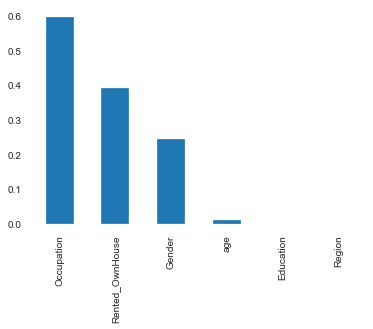

In [44]:
pvalue.plot.bar()

Here the variables('Occupation','Rented_OwnHouse','Gender') have high p-value and thus they are removed from the data.

In [45]:
cat_data=cat_data.drop(['Occupation','Rented_OwnHouse','Gender'],1)
cat_data.head()

,age,Region,Education
0,3,3,1
1,3,3,0
2,3,3,2
3,3,3,4
4,3,3,3


In [46]:
final_data=pd.concat([num_data,cat_data],1)
final_data.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,MonthlyIncome,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,Good_Bad,NumberOfTime0-90DaysLate,age,Region,Education
0,1.0,0.960827,15.416950,0.985839,3.605551,2.44949,1.003472,0,0.622681,3,3,1
1,0.0,0.993452,10.580154,0.872137,2.000000,0.00000,1.000000,1,-0.535760,3,3,0
2,0.0,0.939186,11.090414,0.852020,1.414214,0.00000,0.000000,1,0.620523,3,3,2
3,0.0,0.804136,11.364601,0.805747,2.236068,0.00000,0.000000,1,-0.535760,3,3,4
4,0.0,0.985504,27.606576,0.786651,2.645751,1.00000,0.000000,1,0.043461,3,3,3


In [47]:
pf1=ProfileReport(final_data,title='Profile Report', explorative=True)
pf1.to_widgets()

In [48]:
final_data=final_data.astype(int)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype
---  ------                                --------------   -----
 0   NPA Status                            150000 non-null  int32
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  int32
 2   MonthlyIncome                         150000 non-null  int32
 3   DebtRatio                             150000 non-null  int32
 4   NumberOfOpenCreditLinesAndLoans       150000 non-null  int32
 5   NumberRealEstateLoansOrLines          150000 non-null  int32
 6   NumberOfDependents                    150000 non-null  int32
 7   Good_Bad                              150000 non-null  int32
 8   NumberOfTime0-90DaysLate              150000 non-null  int32
 9   age                                   150000 non-null  int32
 10  Region                                150000 non-null  int32
 11  Education                 

In [49]:
final_data.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,MonthlyIncome,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,Good_Bad,NumberOfTime0-90DaysLate,age,Region,Education
0,1,0,15,0,3,2,1,0,0,3,3,1
1,0,0,10,0,2,0,1,1,0,3,3,0
2,0,0,11,0,1,0,0,1,0,3,3,2
3,0,0,11,0,2,0,0,1,0,3,3,4
4,0,0,27,0,2,1,0,1,0,3,3,3


In [50]:
final_data['Good_Bad'].value_counts()

1    139974
0     10026
Name: Good_Bad, dtype: int64

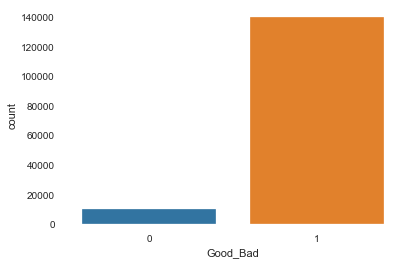

In [51]:
sns.countplot(final_data['Good_Bad'])

As you can see there is imbalance in this output variable. So we will remove the imbalance and use Logistic regression model.

In [52]:
x=final_data.drop('Good_Bad',1)
y=final_data['Good_Bad']

In [53]:
sc = StandardScaler()
scaled= sc.fit_transform(x)
scaled

array([[ 3.73645569, -0.13916078,  0.70024825, ...,  0.6421013 ,
         0.8104916 , -0.78799287],
       [-0.26763331, -0.13916078, -0.96787797, ...,  0.6421013 ,
         0.8104916 , -1.39810225],
       [-0.26763331, -0.13916078, -0.63425273, ...,  0.6421013 ,
         0.8104916 , -0.17788349],
       ...,
       [-0.26763331, -0.13916078,  0.36662301, ...,  0.6421013 ,
         0.13195312,  1.04233527],
       [-0.26763331, -0.13916078,  0.03299776, ...,  0.6421013 ,
         0.13195312,  1.04233527],
       [-0.26763331, -0.13916078,  0.36662301, ..., -0.64587938,
         0.13195312,  1.04233527]])

In [54]:
x1=pd.DataFrame(scaled,index=x.index, columns=x.columns)
x1=x1.astype(float)
x1

,NPA Status,RevolvingUtilizationOfUnsecuredLines,MonthlyIncome,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,NumberOfTime0-90DaysLate,age,Region,Education
0,3.736456,-0.139161,0.700248,-0.555295,0.701343,2.535869,1.238910,-0.052661,0.642101,0.810492,-0.787993
1,-0.267633,-0.139161,-0.967878,-0.555295,-0.411817,-1.224800,1.238910,-0.052661,0.642101,0.810492,-1.398102
2,-0.267633,-0.139161,-0.634253,-0.555295,-1.524977,-1.224800,-0.807161,-0.052661,0.642101,0.810492,-0.177883
3,-0.267633,-0.139161,-0.634253,-0.555295,-0.411817,-1.224800,-0.807161,-0.052661,0.642101,0.810492,1.042335
4,-0.267633,-0.139161,4.703751,-0.555295,-0.411817,0.655535,-0.807161,-0.052661,0.642101,0.810492,0.432226
...,...,...,...,...,...,...,...,...,...,...,...
149995,-0.267633,-0.139161,-1.301503,-0.555295,-0.411817,0.655535,-0.807161,-0.052661,-0.645879,0.131953,1.042335
149996,-0.267633,-0.139161,0.032998,-0.555295,-0.411817,0.655535,1.238910,-0.052661,0.642101,0.131953,1.042335
149997,-0.267633,-0.139161,0.366623,1.798981,1.814502,0.655535,-0.807161,-0.052661,0.642101,0.131953,1.042335
149998,-0.267633,-0.139161,0.032998,-0.555295,-0.411817,-1.224800,-0.807161,-0.052661,0.642101,0.131953,1.042335


In [55]:
final_credit=pd.concat([x1,y],1)
final_credit.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,MonthlyIncome,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,NumberOfTime0-90DaysLate,age,Region,Education,Good_Bad
0,3.736456,-0.139161,0.700248,-0.555295,0.701343,2.535869,1.238910,-0.052661,0.642101,0.810492,-0.787993,0
1,-0.267633,-0.139161,-0.967878,-0.555295,-0.411817,-1.224800,1.238910,-0.052661,0.642101,0.810492,-1.398102,1
2,-0.267633,-0.139161,-0.634253,-0.555295,-1.524977,-1.224800,-0.807161,-0.052661,0.642101,0.810492,-0.177883,1
3,-0.267633,-0.139161,-0.634253,-0.555295,-0.411817,-1.224800,-0.807161,-0.052661,0.642101,0.810492,1.042335,1
4,-0.267633,-0.139161,4.703751,-0.555295,-0.411817,0.655535,-0.807161,-0.052661,0.642101,0.810492,0.432226,1


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size = 0.3,random_state=42)

# Removing imbalance in output variable

In [57]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)   #y_train.ravel() 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 


Before OverSampling, counts of label '1': 97954
Before OverSampling, counts of label '0': 7046 



Using TensorFlow backend.


After OverSampling, the shape of train_X: (195908, 11)
After OverSampling, the shape of train_y: (195908,) 

After OverSampling, counts of label '1': 97954
After OverSampling, counts of label '0': 97954


In [58]:
logr = LogisticRegression(solver='newton-cg',max_iter=300) 
logr.fit(X_train_res, y_train_res.ravel()) 
predictions = logr.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2980
           1       1.00      1.00      1.00     42020

    accuracy                           1.00     45000
   macro avg       1.00      1.00      1.00     45000
weighted avg       1.00      1.00      1.00     45000



In [59]:
logr.score(X_train,y_train)

1.0

In [60]:
logr.score(X_test,y_test)

1.0

In [61]:
confusion_matrix(y_test,predictions)

array([[ 2980,     0],
       [    0, 42020]], dtype=int64)

# Cross-checking predicted value with actual output value.

In [62]:
b=final_credit.iloc[149960:149969,:]
b

,NPA Status,RevolvingUtilizationOfUnsecuredLines,MonthlyIncome,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,NumberOfTime0-90DaysLate,age,Region,Education,Good_Bad
149960,-0.267633,-0.139161,0.366623,1.798981,-1.524977,-1.224800,-0.807161,-0.052661,0.642101,0.131953,1.042335,1
149961,3.736456,-0.139161,-1.635128,-0.555295,-0.411817,-1.224800,-0.807161,-0.052661,0.642101,1.489030,-0.787993,0
149962,-0.267633,5.448130,-0.967878,-0.555295,-0.411817,-1.224800,1.238910,0.087087,0.642101,0.131953,1.042335,1
149963,-0.267633,-0.139161,0.366623,1.798981,0.701343,-1.224800,1.238910,-0.052661,-0.645879,0.131953,1.042335,1
149964,-0.267633,5.448130,0.032998,-0.555295,-0.411817,0.655535,-0.807161,-0.052661,-0.645879,0.131953,1.042335,1
149965,-0.267633,-0.139161,0.366623,1.798981,-1.524977,-1.224800,-0.807161,-0.052661,-3.221841,0.131953,1.042335,1
149966,-0.267633,-0.139161,1.701124,-0.555295,0.701343,0.655535,-0.807161,-0.052661,0.642101,0.131953,1.042335,1
149967,-0.267633,-0.139161,0.366623,1.798981,-0.411817,-1.224800,-0.807161,-0.052661,-0.645879,0.131953,1.042335,1
149968,3.736456,-0.139161,-0.300627,-0.555295,-1.524977,-1.224800,1.238910,-0.052661,0.642101,1.489030,-0.787993,0


As you can see the output values(i.e 'Good_Bad') are 1,0,1,1,1,1,1,1,0

In [63]:
b=b.drop('Good_Bad',1)
b

,NPA Status,RevolvingUtilizationOfUnsecuredLines,MonthlyIncome,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,NumberOfTime0-90DaysLate,age,Region,Education
149960,-0.267633,-0.139161,0.366623,1.798981,-1.524977,-1.224800,-0.807161,-0.052661,0.642101,0.131953,1.042335
149961,3.736456,-0.139161,-1.635128,-0.555295,-0.411817,-1.224800,-0.807161,-0.052661,0.642101,1.489030,-0.787993
149962,-0.267633,5.448130,-0.967878,-0.555295,-0.411817,-1.224800,1.238910,0.087087,0.642101,0.131953,1.042335
149963,-0.267633,-0.139161,0.366623,1.798981,0.701343,-1.224800,1.238910,-0.052661,-0.645879,0.131953,1.042335
149964,-0.267633,5.448130,0.032998,-0.555295,-0.411817,0.655535,-0.807161,-0.052661,-0.645879,0.131953,1.042335
149965,-0.267633,-0.139161,0.366623,1.798981,-1.524977,-1.224800,-0.807161,-0.052661,-3.221841,0.131953,1.042335
149966,-0.267633,-0.139161,1.701124,-0.555295,0.701343,0.655535,-0.807161,-0.052661,0.642101,0.131953,1.042335
149967,-0.267633,-0.139161,0.366623,1.798981,-0.411817,-1.224800,-0.807161,-0.052661,-0.645879,0.131953,1.042335
149968,3.736456,-0.139161,-0.300627,-0.555295,-1.524977,-1.224800,1.238910,-0.052661,0.642101,1.489030,-0.787993


In [64]:
logr.predict(b)

array([1, 0, 1, 1, 1, 1, 1, 1, 0])

The predicted values are also same as the actual output value. So, we can say that our model is pretty accurate in predicting the output of the data.